# Introduction

This notebook was written by Janine George (E-mail: [janine.george@uclouvain.be](mailto:janine.george@uclouvain.be) Université catholique de Louvain, [https://jageo.github.io/](https://jageo.github.io/)).

This notebook shows how to plot Crystal Orbital Hamilton Population (COHP) and projected densities of states calculated with the Local-Orbital Basis Suite Towards Electronic-Structure Reconstruction (LOBSTER) code. Furtheremore, the classes Icohplist and Charge to evaluate ICOHPLIST.lobster and CHARGE.lobster are explained. See http://www.cohp.de for more information. The code to plot COHP and evaluate ICOHPLIST.lobster in pymatgen was started Marco Esters and Anubhav Jain and extended by Janine George. The classes to plot DOSCAR.lobster, and to evaluate CHARGE.lobster were written by Janine George.

In [ ]:
# Uncomment the subsequent lines in this cell to install dependencies for Google Colab.
# !pip install pymatgen==2022.7.19

# How to plot COHPCAR.lobster

## get relevant classes

In [ ]:
from pymatgen.electronic_structure.cohp import CompleteCohp
from pymatgen.electronic_structure.plotter import CohpPlotter

%matplotlib inline

## get a completecohp object to simplify the plotting

In [ ]:
COHPCAR_path = "lobster_data/GaAs/COHPCAR.lobster"
POSCAR_path = "lobster_data/GaAs/POSCAR"

completecohp = CompleteCohp.from_file(
    fmt="LOBSTER", filename=COHPCAR_path, structure_file=POSCAR_path
)

/mnt/c/Users/jageorge/Projects/SoftwareUpdate_Pymatgen/pymatgen/pymatgen/electronic_structure/cohp.py:623: UserWarning: The bond labels are currently consistent with ICOHPLIST.lobster/ICOOPLIST.lobster, not with COHPCAR.lobster/COOPCAR.lobster. Please be aware!
  "The bond labels are currently consistent with ICOHPLIST.lobster/ICOOPLIST.lobster, not with "


## plot certain COHP
You have to search for the label of the COHP you would like to plot in ICOHPLIST.lobster

This is a COHP between the following sites: [0. 0. 0.] Ga and [4.3126365 4.3126365 4.3126365] As


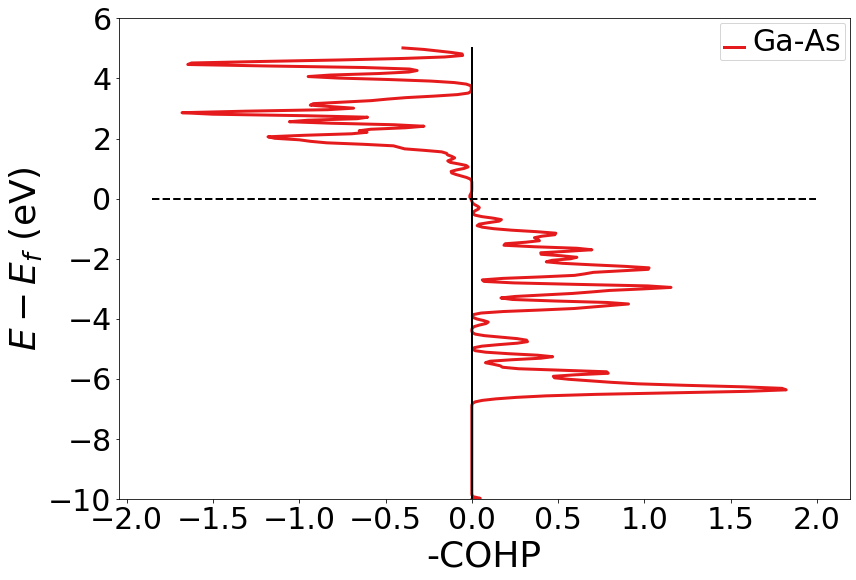

In [ ]:
# search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)
label = "16"
cp = CohpPlotter()
# get a nicer plot label
plotlabel = (
    str(completecohp.bonds[label]["sites"][0].species_string)
    + "-"
    + str(completecohp.bonds[label]["sites"][1].species_string)
)

cp.add_cohp(plotlabel, completecohp.get_cohp_by_label(label=label))
# check which COHP you are plotting

print(
    "This is a COHP between the following sites: "
    + str(completecohp.bonds[label]["sites"][0])
    + " and "
    + str(completecohp.bonds[label]["sites"][1])
)

x = cp.get_plot(integrated=False)
x.ylim([-10, 6])

x.show()

## add several COHPs

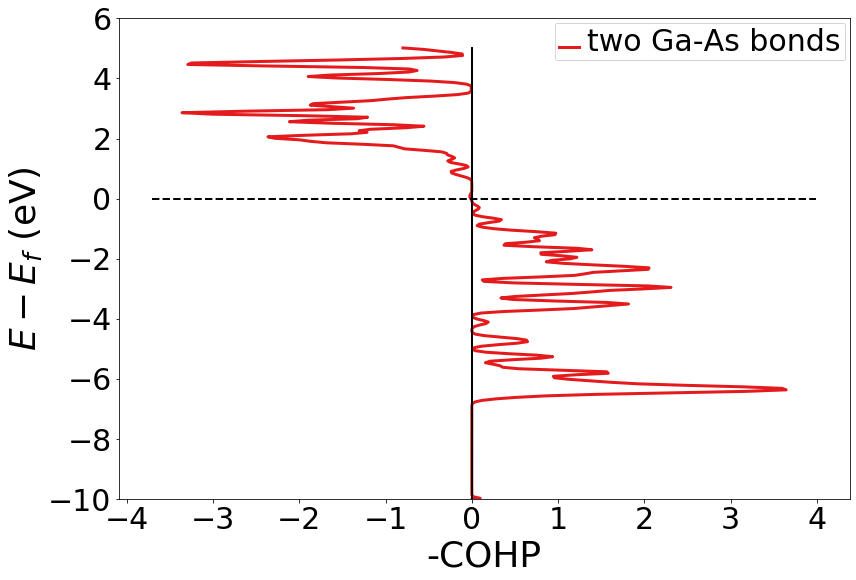

In [ ]:
# labels of the COHPs that will be summed!
labelist = ["16", "21"]
cp = CohpPlotter()
# get a nicer plot label
plotlabel = "two Ga-As bonds"

cp.add_cohp(
    plotlabel,
    completecohp.get_summed_cohp_by_label_list(label_list=labelist, divisor=1),
)
x = cp.get_plot(integrated=False)
x.ylim([-10, 6])
x.show()

## focus on certain orbitals only

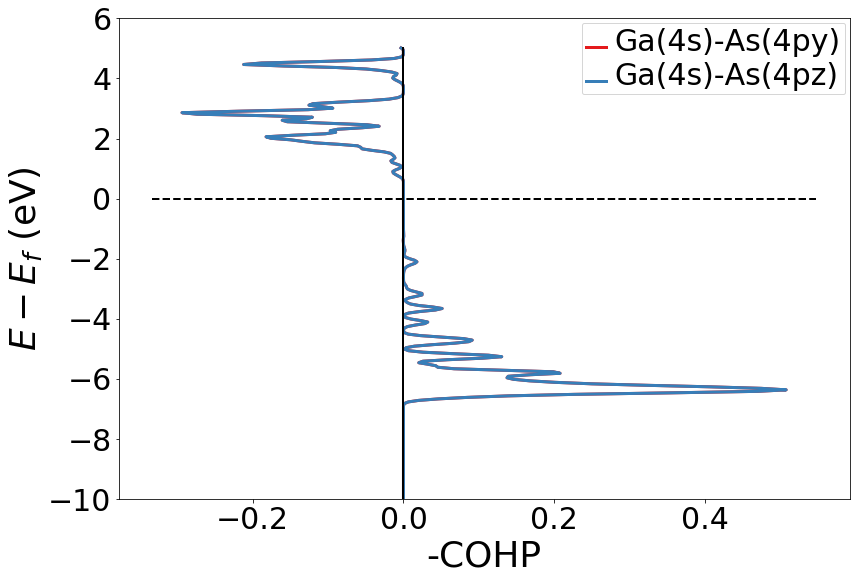

In [ ]:
# search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)
label = "16"
cp = CohpPlotter()

# get orbital object
from pymatgen.electronic_structure.core import Orbital

# interaction between 4s and 4px
orbitals = [[4, Orbital.s], [4, Orbital.py]]
orbitals2 = [[4, Orbital.s], [4, Orbital.pz]]
# get a nicer plot label

plotlabel = (
    str(completecohp.bonds[label]["sites"][0].species_string)
    + "(4s)"
    + "-"
    + str(completecohp.bonds[label]["sites"][1].species_string)
    + "(4py)"
)
plotlabel2 = (
    str(completecohp.bonds[label]["sites"][0].species_string)
    + "(4s)"
    + "-"
    + str(completecohp.bonds[label]["sites"][1].species_string)
    + "(4pz)"
)

cp.add_cohp(
    plotlabel, completecohp.get_orbital_resolved_cohp(label=label, orbitals=orbitals)
)
cp.add_cohp(
    plotlabel2, completecohp.get_orbital_resolved_cohp(label=label, orbitals=orbitals2)
)
# check which COHP you are plotting

# with integrated=True, you can plot the integrated COHP
x = cp.get_plot(integrated=False)
x.ylim([-10, 6])

x.show()

# How to evaluate ICOHPLIST.lobster

## get relevant classes

In [ ]:
from pymatgen.io.lobster import Icohplist

## read in ICOHPLIST.lobster and get Icohpcollection object

In [ ]:
icohplist = Icohplist(filename="lobster_data/GaAs/ICOHPLIST.lobster")
icohpcollection = icohplist.icohpcollection

## get interesting properties from ICOHPLIST.lobster 

In [ ]:
# get icohp value by label (labelling according to ICOHPLIST.lobster)
# for spin polarized calculations you can also sum the spin channels
print("icohp value for certain bond by label")
label = "16"
print(icohpcollection.get_icohp_by_label(label))
print()
# you can get all Icohpvalue objects for certain bond lengths
print("Icohp values for certain bonds with certain bond lengths")
for key, icohp in icohpcollection.get_icohp_dict_by_bondlengths(
    minbondlength=0.0, maxbondlength=3.0
).items():
    print(key + ":" + str(icohp.icohp))
print()
# you can get all icohps for a certain site
print("ICOHP values of certain site")
for key, icohp in icohpcollection.get_icohp_dict_of_site(
    site=0, minbondlength=0.0, maxbondlength=3.0
).items():
    print(key + ":" + str(icohp.icohp))

icohp value for certain bond by label
-4.35464

Icohp values for certain bonds with certain bond lengths
16:{<Spin.up: 1>: -4.35464}
21:{<Spin.up: 1>: -4.35464}
23:{<Spin.up: 1>: -4.35464}
24:{<Spin.up: 1>: -4.35464}

ICOHP values of certain site
16:{<Spin.up: 1>: -4.35464}
21:{<Spin.up: 1>: -4.35464}
23:{<Spin.up: 1>: -4.35464}
24:{<Spin.up: 1>: -4.35464}


# How to plot DOSCAR.lobster:

## get relevant classes

In [ ]:
from pymatgen.core.composition import Element
from pymatgen.electronic_structure.plotter import DosPlotter

# relevant classes
from pymatgen.io.lobster import Doscar

%matplotlib inline

## read in DOSCAR.lobster and get structure object for later

In [ ]:
# read in DOSCAR.lobster
doscar = Doscar(
    doscar="lobster_data/GaAs/DOSCAR.lobster", structure_file="lobster_data/GaAs/POSCAR"
)
complete_dos = doscar.completedos
# get structure object
structure = complete_dos.structure

## plot total density of states

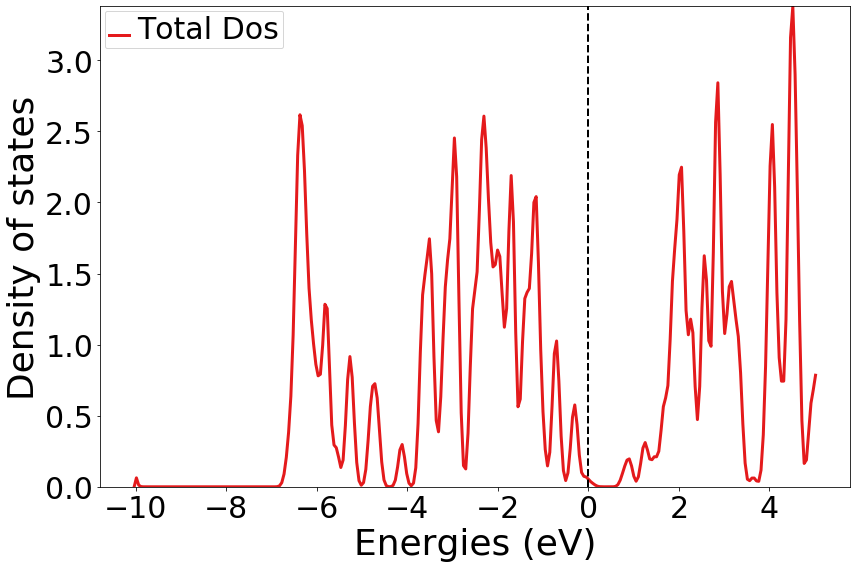

In [ ]:
# plot total dos
Plotter = DosPlotter()
Plotter.add_dos("Total Dos", doscar.tdos)
Plotter.get_plot().show()

## plot DOS projected on s, p, and d orbitals for certain element

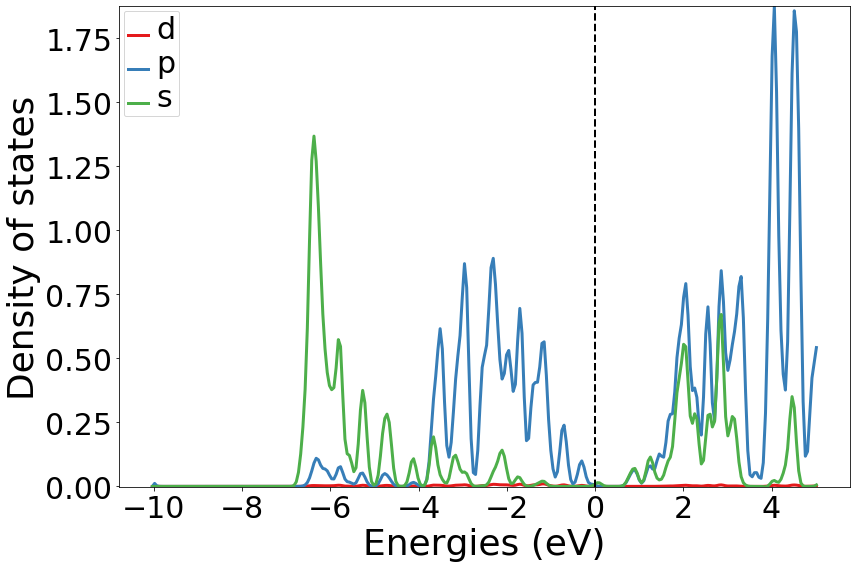

In [ ]:
# plot DOS of s,p, and d orbitals for certain element
Plotter = DosPlotter()
el = Element("Ga")
Plotter.add_dos_dict(complete_dos.get_element_spd_dos(el=el))
Plotter.get_plot().show()

## plot DOS for cetain sites and orbitals

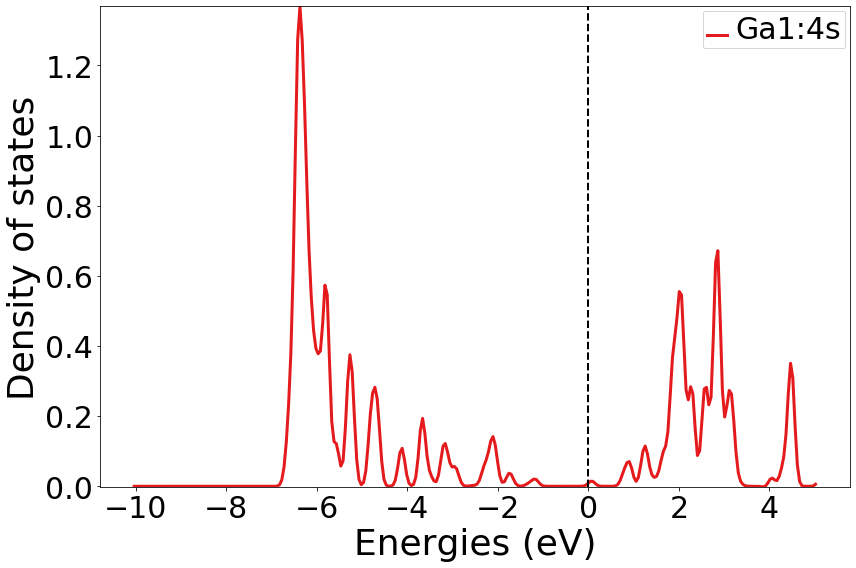

In [ ]:
Plotter = DosPlotter()
# choose the sites you would like to plot
for isite, site in enumerate(structure[0:1]):
    # name the orbitals you would like to include
    # the other orbitals are named in a similar way. The orbitals are called: "s", "p_y", "p_z", "p_x", "d_xy", "d_yz", "d_z^2","d_xz", "d_x^2-y^2", "f_y(3x^2-y^2)", "f_xyz","f_yz^2", "f_z^3", "f_xz^2", "f_z(x^2-y^2)", "f_x(x^2-3y^2)"
    for orbital in ["4s"]:
        Plotter.add_dos(
            "Ga" + str(isite + 1) + ":" + orbital,
            complete_dos.get_site_orbital_dos(site, orbital),
        )
Plotter.get_plot().show()

# evaluate CHARGE.lobster 

## get relevant classes

In [ ]:
from pymatgen.io.lobster import Charge

## read in charge and produce a structure with the charge as a property

In [ ]:
charge = Charge(filename="lobster_data/GaAs/CHARGE.lobster")
newstructure = charge.get_structure_with_charges(
    structure_filename="lobster_data/GaAs/POSCAR"
)
print(newstructure)

Full Formula (Ga1 As1)
Reduced Formula: GaAs
abc   :   4.065993   4.065993   4.065993
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP       a     b     c    Loewdin Charges    Mulliken Charges
---  ----  ----  ----  ----  -----------------  ------------------
  0  Ga    0     0     0                 -0.06                0.15
  1  As    0.75  0.75  0.75               0.06               -0.15


# evaluate GROSSPOP.lobster

## get relevant class

In [ ]:
from pymatgen.io.lobster import Grosspop

In [ ]:
grosspop = Grosspop(filename="lobster_data/GaAs/GROSSPOP.lobster")
print(grosspop.list_dict_grosspop)

[{'element': 'Ga', 'Mulliken GP': {'4s': 1.22, '4p_y': 0.54, '4p_z': 0.54, '4p_x': 0.54, '3d_xy': 2.0, '3d_yz': 2.0, '3d_z^2': 2.0, '3d_xz': 2.0, '3d_x^2-y^2': 2.0, 'total': 12.85}, 'Loewdin GP': {'4s': 1.1, '4p_y': 0.66, '4p_z': 0.66, '4p_x': 0.66, '3d_xy': 2.0, '3d_yz': 2.0, '3d_z^2': 2.0, '3d_xz': 2.0, '3d_x^2-y^2': 2.0, 'total': 13.06}}, {'element': 'As', 'Mulliken GP': {'4s': 1.64, '4p_y': 1.17, '4p_z': 1.17, '4p_x': 1.17, 'total': 5.15}, 'Loewdin GP': {'4s': 1.38, '4p_y': 1.19, '4p_z': 1.19, '4p_x': 1.19, 'total': 4.94}}]


## get a structure with total gross populations

In [ ]:
newstructure = grosspop.get_structure_with_total_grosspop("lobster_data/GaAs/POSCAR")
print("Structure:")
print(newstructure)

Structure:
Full Formula (Ga1 As1)
Reduced Formula: GaAs
abc   :   4.065993   4.065993   4.065993
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP       a     b     c    Total Loewdin GP    Total Mulliken GP
---  ----  ----  ----  ----  ------------------  -------------------
  0  Ga    0     0     0                  13.06                12.85
  1  As    0.75  0.75  0.75                4.94                 5.15


# FATBAND plot

## get relevant classes

In [ ]:
from pymatgen.electronic_structure.plotter import (
    BSDOSPlotter,
    BSPlotter,
    BSPlotterProjected,
)
from pymatgen.io.lobster import Fatband

## get a bandstructure plot that is combined with a DOS plot

/mnt/c/Users/jageorge/Projects/SoftwareUpdate_Pymatgen/pymatgen/pymatgen/io/lobster.py:1005: UserWarning: Make sure all relevant FATBAND files were generated and read in!
  warnings.warn('Make sure all relevant FATBAND files were generated and read in!')
/mnt/c/Users/jageorge/Projects/SoftwareUpdate_Pymatgen/pymatgen/pymatgen/io/lobster.py:1006: UserWarning: Use Lobster 3.2.0 or newer for fatband calculations!
  warnings.warn('Use Lobster 3.2.0 or newer for fatband calculations!')
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


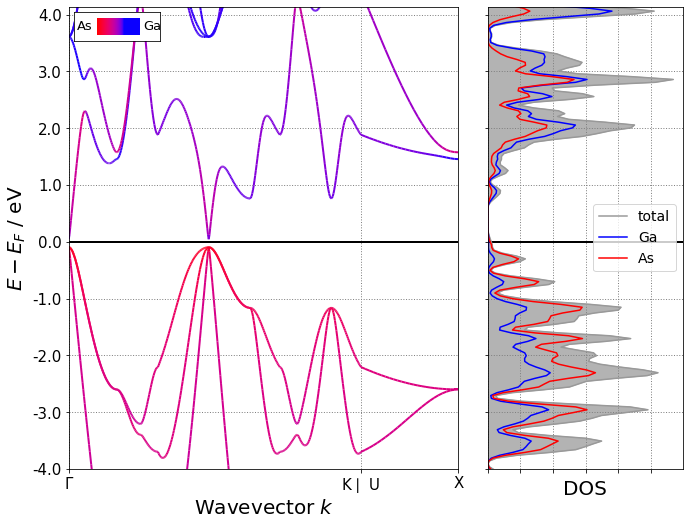

In [ ]:
fatband = Fatband(
    filenames="lobster_data/GaAs",
    vasprun="lobster_data/GaAs/vasprun.xml",
    Kpointsfile="lobster_data/GaAs/KPOINTS",
)
# get a band structure object
bssymline = fatband.get_bandstructure()
# print(bssymline.as_dict())

# this can be plotted with the classes to plot bandstructures from vasp
BSDOSPlotter(bs_projection="elements", dos_projection="elements").get_plot(
    bs=bssymline, dos=complete_dos
).show()

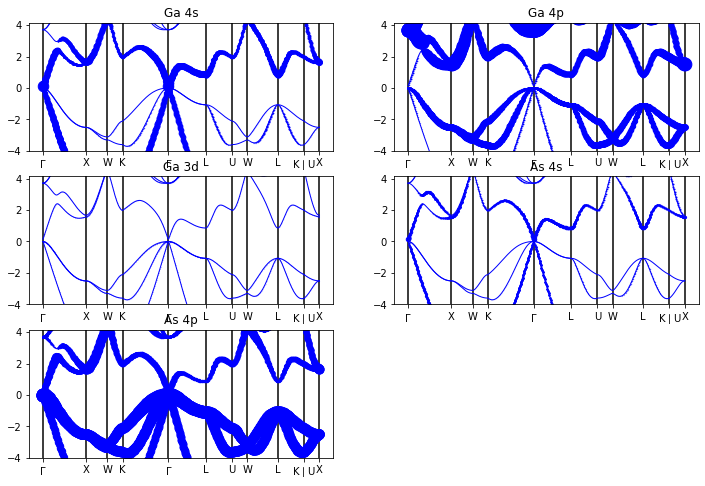

In [ ]:
# another plot type from pymatgen:
bsplotter = BSPlotterProjected(bssymline)
bsplotter.get_projected_plots_dots(
    {"Ga": ["4s", "4p", "3d"], "As": ["4s", "4p"]}
).show()

# Read lobsterout

In [ ]:
from pymatgen.io.lobster import Lobsterout

## get all relevant infos from lobsterout

In [ ]:
lobsterout = Lobsterout("lobster_data/GaAs/lobsterout")

document = lobsterout.get_doc()

/mnt/c/Users/jageorge/Projects/SoftwareUpdate_Pymatgen/pymatgen/pymatgen/io/lobster.py:671: UserWarning: Make sure the lobsterout is read in correctly. This is a brand new class.
  warnings.warn("Make sure the lobsterout is read in correctly. This is a brand new class.")


## charge spilling can be accessed easily

In [ ]:
print(document["chargespilling"])

[0.009899999999999999]


# Create input files for vasp and lobster automatically

## relevant classes

In [ ]:
from pymatgen.io.lobster import Lobsterin

## a Lobsterin object with standard settings is created, a standard basis is used

In [ ]:
lobsterin = Lobsterin.standard_calculations_from_vasp_files(
    "lobster_data/GaAs/POSCAR",
    "lobster_data/GaAs/INCAR",
    "lobster_data/GaAs/POTCAR",
    option="standard",
)

/mnt/c/Users/jageorge/Projects/SoftwareUpdate_Pymatgen/pymatgen/pymatgen/io/lobster.py:1681: UserWarning: Always check and test the provided basis functions. The spilling of your Lobster calculation might help
  "Always check and test the provided basis functions. The spilling of your Lobster calculation might help")


## writes lobsterin

In [ ]:
lobsterin.write_lobsterin(path="lobsterin")
file = open("./lobsterin")
print(file.read())

COHPstartEnergy -15.0
COHPendEnergy 5.0
basisSet pbeVaspFit2015
cohpGenerator from 0.1 to 6.0 orbitalwise
gaussianSmearingWidth 0.1
saveProjectionToFile
basisfunctions Ga 3d 4p 4s 
basisfunctions As 4p 4s 



## will change ISYM to -1, NSW to 0, insert NBANDS, and set LWAVE to True in the INCAR
## additional changes to the INCAR are allowed via further_settings

In [ ]:
lobsterin.write_INCAR(
    incar_input="lobster_data/GaAs/INCAR",
    incar_output="INCAR.lobster",
    poscar_input="lobster_data/GaAs/POSCAR",
    isym=-1,
    further_settings={"IBRION": -1},
)
file = open("./INCAR.lobster")
print(file.read())

ALGO = Normal
EDIFF = 1e-07
EDIFFG = 1e-05
ENCUT = 520
IBRION = -1
ISIF = 3
ISMEAR = 0
ISPIN = 1
ISYM = -1
LCHARG = False
LORBIT = 11
LWAVE = True
NBANDS = 13
NELM = 200
NELMIN = 4
NPAR = 4
NSW = 0
POTIM = 0.5
PREC = Accurate
SIGMA = 0.1



/mnt/c/Users/jageorge/Projects/SoftwareUpdate_Pymatgen/pymatgen/pymatgen/io/lobster.py:1399: UserWarning: Please check your incar_input before using it. This method only changes three settings!
  warnings.warn("Please check your incar_input before using it. This method only changes three settings!")


## a Lobsterin object with standard settings is created, a basis given by the user is used

In [ ]:
lobsterin = Lobsterin.standard_calculations_from_vasp_files(
    "lobster_data/GaAs/POSCAR",
    "lobster_data/GaAs/INCAR",
    "lobster_data/GaAs/POTCAR",
    option="standard",
    dict_for_basis={"Ga": "4s 4p", "As": "4s 4p"},
)

# writes lobsterin
lobsterin.write_lobsterin(path="lobsterin")
file = open("./lobsterin")
print(file.read())

COHPstartEnergy -15.0
COHPendEnergy 5.0
basisSet pbeVaspFit2015
cohpGenerator from 0.1 to 6.0 orbitalwise
gaussianSmearingWidth 0.1
saveProjectionToFile
basisfunctions Ga 4s 4p
basisfunctions As 4s 4p

